### Exploratory Data Analysis (EDA)
Explore the data to describe current farming practices, identify trends, and detect relationships between agronomic decisions and yield outcomes.”
  
1.What to analyze:
How much land is cultivated?

What soil types and drainage conditions exist and how do they contribute to the yield ?

How many farmers use organic vs. chemical fertilizers?

When do farmers transplant or harvest?

Descriptive Profiling of Farming Practices

2.EDA report with:
- Descriptive statistics.
- Visualizations of input use and yield patterns.
- Subgroup comparisons and trend analyses.
- Data quality assessment.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import os

### 1.Descriptive statistics

We’ll start by calculating key summary statistics for the dataset you uploaded (Cleaned_data.csv):

Numeric variables: count, mean, std deviation, min, max, quartiles

Categorical variables: count of unique values and top frequent values

I'll now run the analysis on the file.

- Here's the summary of the descriptive statistics from your cleaned dataset:

Dataset Overview:
Total columns: 70

Numeric columns: 45

Categorical/text columns: 25

Sample rows shown: 3 (preview below)

- Descriptive Statistics for Numeric Columns (45 variables):
Includes:

count: number of non-missing entries

mean: average

std: standard deviation

min & max: range of values

25%, 50%, 75%: quartiles (spread of data)

- Summary of Categorical Columns (25 variables):
Includes:

count: number of non-missing entries

unique: number of unique values

top: most frequent category

freq: frequency of the top value


In [2]:
# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Cleaned_data1.csv")
df

district       block  record_id        farmer_id  \
0               Siwan   Pachrukhi      11048  202308080747453   
1               Siwan   Pachrukhi      12569  202308080801503   
2               Siwan   Pachrukhi      12485  202308080948183   
3               Siwan   Pachrukhi       9649  202308081818373   
4               Siwan   Pachrukhi      13111  202308091100453   
...               ...         ...        ...              ...   
24064  West_Champaran  Majhauliya      31773  202311021259343   
24065  West_Champaran  Majhauliya      31774  202311021259483   
24066  West_Champaran  Majhauliya      31775  202311021300233   
24067  West_Champaran  Majhauliya      31776  202311021300363   
24068  West_Champaran  Majhauliya      31777  202311021300523   

       total_cultivable_land_llu  land_under_rice_llu  \
0                            5.0                  5.0   
1                           15.0                 15.0   
2                           15.0                 15.0   
3                           16.0                 16.0   
4                           15.0                 15.0   
...                          ...                  ...   
24064                        5.0                  5.0   
24065                        5.0                  5.0   
24066                        5.0                  5.0   
24067                        5.0                  5.0   
24068                        5.0                  5.0   

       largest_rice_plot_area_llu drainage_class  soil_type previous_crop  \
0                           0.185        lowland  blacksoil         Wheat   
1                           0.148     mediumland   claysoil         Wheat   
2                           0.148         upland  sandysoil         Wheat   
3                           0.185     mediumland   claysoil         Wheat   
4                           0.185     mediumland   claysoil         Wheat   
...                           ...            ...        ...           ...   
24064                       5.000         upland  sandyloam         Wheat   
24065                       5.000         upland  sandyloam         Wheat   
24066                       5.000     mediumland  sandysoil         Wheat   
24067                       5.000         upland  sandyloam         Wheat   
24068                       5.000         upland  sandyloam         Wheat   

       ... weeding_times weeding_method  harvest_month harvest_week  \
0      ...           2.0         byHand     2023-11-01            2   
1      ...           2.0         byHand     2023-11-01            2   
2      ...           2.0         byHand     2023-11-01            1   
3      ...           2.0         byHand     2023-11-01            3   
4      ...           2.0         byHand     2023-11-01            3   
...    ...           ...            ...            ...          ...   
24064  ...           2.0         byHand     2023-10-01            2   
24065  ...           2.0         byHand     2023-10-01            2   
24066  ...           1.0         byHand     2023-10-01            2   
24067  ...           2.0         byHand     2023-10-01            2   
24068  ...           2.0         byHand     2023-10-01            2   

      harvest_method  yield_kg harvest_income_inr  video_seen_flag  \
0             byHand     400.0              900.0              yes   
1             byHand     300.0              600.0              yes   
2             byHand     360.0              600.0              yes   
3             byHand     420.0              900.0              yes   
4             byHand     500.0             1200.0              yes   
...              ...       ...                ...              ...   
24064         byHand     580.0              800.0              yes   
24065         byHand     600.0              800.0              yes   
24066         byHand     580.0              800.0              yes   
24067         byHand     600.0             1000.0              yes   

In [3]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include='number').columns
print("\n Numerical columns")
numeric_cols


 Numerical columns


Index(['record_id', 'farmer_id', 'total_cultivable_land_llu',
       'land_under_rice_llu', 'largest_rice_plot_area_llu',
       'seedling_age_days', 'rice_tillage_depth_cm', 'irrigation_event_count',
       'organic_ganaura_used', 'organic_fym_used', 'organic_vermicompost_used',
       'organic_poultry_manure_used', 'organic_fert_qty_type1',
       'organic_fert_qty_type2', 'organic_fert_qty_type3',
       'organic_fert_qty_type4', 'chemical_fertilizer_application_count',
       'chem_fert_urea_used_flag', 'chem_fert_dap_used_flag',
       'chem_fert_npks_used_flag', 'chem_fert_mop_used_flag',
       'chem_fert_ssp_used_flag', 'chem_fert_zinc_used_flag', 'basal_urea_kg',
       'basal_dap_kg', 'basal_npks_kg', 'basal_mop_kg', 'basal_ssp_kg',
       'basal_zinc_kg', 'disease_leaves_yellowing', 'disease_blast',
       'disease_scorching', 'disease_false_smut', 'disease_others',
       'used_brahmastra_flag', 'used_lohastra_flag', 'used_jivamrit_flag',
       'used_neemastra_flag', 'used

In [4]:
categorical_cols = df.select_dtypes(exclude='number').columns
print("\n categorical_columns")
categorical_cols


 categorical_columns


Index(['district', 'block', 'drainage_class', 'soil_type', 'previous_crop',
       'previous_crop_tillage_method', 'previous_crop_transplant_date',
       'rice_tillage_month', 'rice_tillage_method', 'irrigation_applied_flag',
       'organic_fertilizer_used_flag', 'chemical_fertilizer_used_flag',
       'fertilizer_used_during_land_preparation',
       'chemical_fertilizers_used_list', 'npks_type', 'disease_observed_flag',
       'disease_type', 'organic_pesticide_used_flag', 'organic_pesticide_type',
       'weeding_method', 'harvest_month', 'harvest_method', 'video_seen_flag',
       'video_topic_seen'],
      dtype='object')

### Descriptive Stats for Numeric Columns

In [5]:
numeric_summary = df[numeric_cols].describe().T
print("Numeric Summary:")
print(numeric_summary)

Numeric Summary:
                                         count          mean           std  \
record_id                              24069.0  1.700897e+04  8.611623e+03   
farmer_id                              24069.0  2.023088e+14  6.596012e+08   
total_cultivable_land_llu              24069.0  9.660692e+00  5.089224e+00   
land_under_rice_llu                    24069.0  9.660692e+00  5.089224e+00   
largest_rice_plot_area_llu             24069.0  1.170585e+00  3.696591e+00   
seedling_age_days                      24069.0  2.313237e+01  5.195842e+00   
rice_tillage_depth_cm                  24069.0  1.175396e+01  4.378581e+00   
irrigation_event_count                 24069.0  2.627695e+00  1.655175e+00   
organic_ganaura_used                   24069.0  1.650671e-01  3.712488e-01   
organic_fym_used                       24069.0  4.918775e-01  4.999444e-01   
organic_vermicompost_used              24069.0  3.689393e-02  1.885053e-01   
organic_poultry_manure_used            24069.0 

### Descriptive Stats for Categorical Columns

In [6]:
# Summary stats for categorical columns
categorical_summary = df[categorical_cols].describe().T
print("Categorical Summary:")
print(categorical_summary)


Categorical Summary:
                                         count unique  \
district                                 24069     11   
block                                    24069     33   
drainage_class                           24069      3   
soil_type                                24069      7   
previous_crop                            24069     14   
previous_crop_tillage_method             24069      7   
previous_crop_transplant_date            24069     16   
rice_tillage_month                       24069     12   
rice_tillage_method                      24069      5   
irrigation_applied_flag                  24069      2   
organic_fertilizer_used_flag             24069      2   
chemical_fertilizer_used_flag            24069      3   
fertilizer_used_during_land_preparation  24069      3   
chemical_fertilizers_used_list           24069     92   
npks_type                                  639     10   
disease_observed_flag                    24069      2   
disease_ty

### 2. Visualizations of input use and yield patterns.

## a. Distribution of Yield

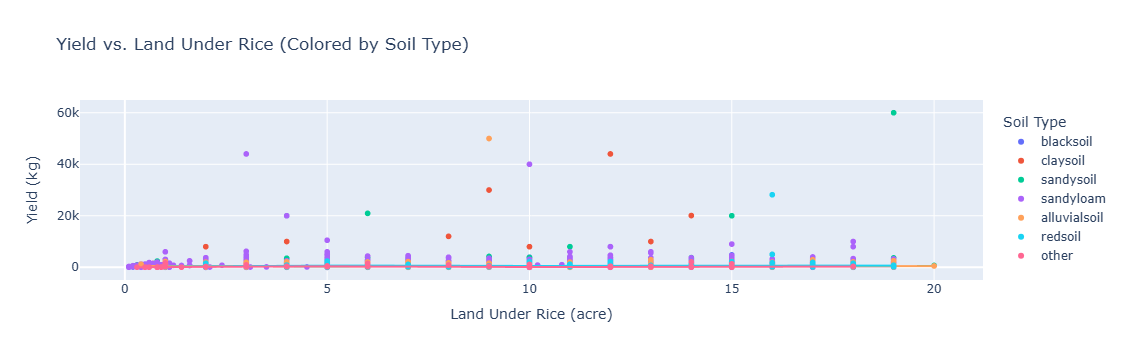

In [7]:
import plotly.express as px

import plotly.express as px

fig = px.scatter(
    df,
    x='land_under_rice_llu', 
    y='yield_kg',
    color='soil_type',  # Adds color grouping + legend
    trendline='lowess',  # Smooth trendline
    title='Yield vs. Land Under Rice (Colored by Soil Type)',
    labels={
        'land_under_rice_llu': 'Land Under Rice (acre)', 
        'yield_kg': 'Yield (kg)',
        'soil_type': 'Soil Type'  # Legend title
    }
)

# Customize legend position (optional)
fig.update_layout(
    legend_title_text='Soil Type',  # Explicit legend title
    legend=dict(
        x=1.02,  # Places legend outside the plot (right side)
        y=0.5,
        bgcolor='rgba(255,255,255,0.5)'  # Semi-transparent background
    )
)

fig.show()

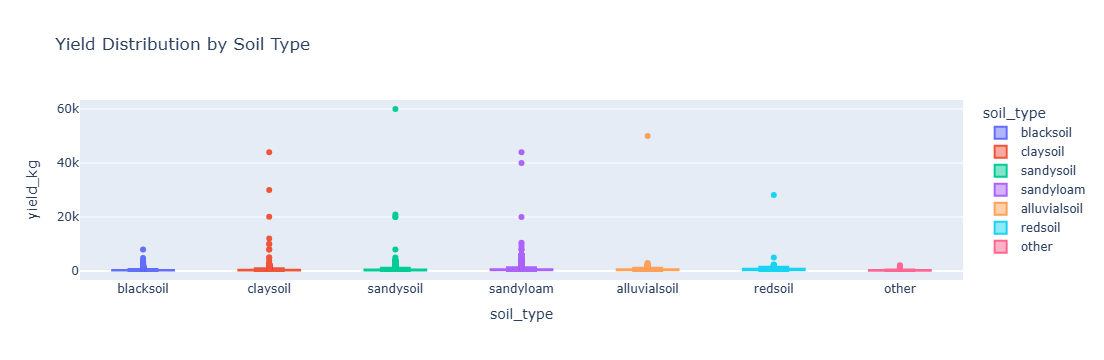

In [26]:
fig = px.box(
    df,
    x='soil_type',  # Replace with your column name
    y='yield_kg',
    color='soil_type',
    title='Yield Distribution by Soil Type'
)
fig.show()

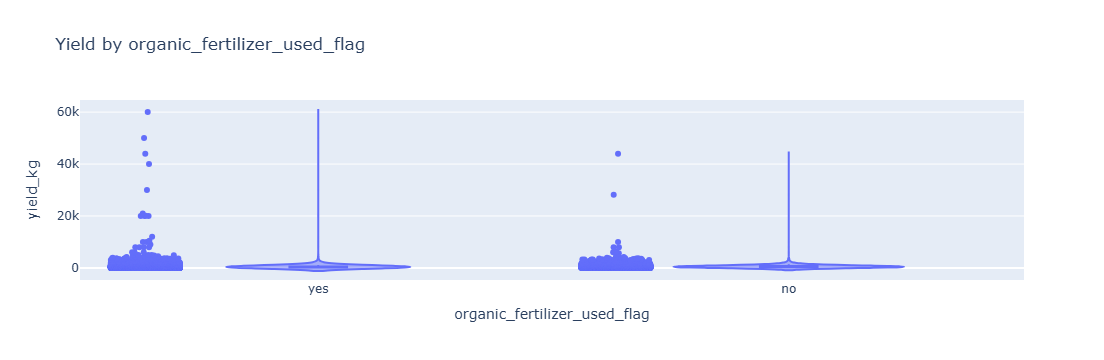

In [27]:
fig = px.violin(
    df,
    x='organic_fertilizer_used_flag',  # Replace with your column name
    y='yield_kg',
    box=True,  # Adds box plot inside
    points='all',
    title='Yield by organic_fertilizer_used_flag'
)
fig.show()

### 1.Descriptive Profiling of Farming Practices

In [10]:
# Key metrics to profile
practice_columns = [
    'soil_type', 'drainage_class', 'rice_tillage_method', 
    'irrigation_event_count', 'organic_fertilizer_used_flag',
    'chemical_fertilizers_used_list', 'weeding_times', 'harvest_method'
]

# Generate profiles
profiles = df[practice_columns].describe(include='all').T
profiles['frequency'] = df[practice_columns].apply(lambda x: x.value_counts().iloc[0])
print(profiles)

                                  count unique            top   freq  \
soil_type                         24069      7      sandyloam  13126   
drainage_class                    24069      3     mediumland  16242   
rice_tillage_method               24069      5  TractorPlough  15355   
irrigation_event_count          24069.0    NaN            NaN    NaN   
organic_fertilizer_used_flag      24069      2            yes  15843   
chemical_fertilizers_used_list    24069     92       Urea DAP   9514   
weeding_times                   24069.0    NaN            NaN    NaN   
harvest_method                    24069      2         byHand  23657   

                                    mean       std  min  25%  50%  75%   max  \
soil_type                            NaN       NaN  NaN  NaN  NaN  NaN   NaN   
drainage_class                       NaN       NaN  NaN  NaN  NaN  NaN   NaN   
rice_tillage_method                  NaN       NaN  NaN  NaN  NaN  NaN   NaN   
irrigation_event_count         

In [11]:
df['chemical_fertilizer_used_flag'].unique()

array(['yes', 'not specified', 'no'], dtype=object)

In [12]:
df['harvest_method'].unique()

array(['byHand', 'byMachine'], dtype=object)

In [13]:
df['chemical_fertilizers_used_list'].unique()

array(['Urea DAP', 'Not Specified', 'Urea', 'DAP MoP', 'DAP Urea',
       'DAP NPKS', 'Urea DAP Zinc', 'Urea DAP Zinc MoP',
       'Urea DAP MoP Zinc', 'DAP', 'DAP NPKS Urea', 'NPKS DAP',
       'Urea NPKS', 'DAP MoP Zinc', 'Zinc', 'DAP NPKS Zinc', 'Urea SSP',
       'Urea DAP MoP', 'DAP Zinc', 'Zinc DAP', 'DAP Zinc MoP',
       'Urea DAP NPKS', 'NPKS Urea', 'Urea Other', 'Urea Other MoP',
       'NPKS', 'MoP', 'MoP DAP', 'Zinc DAP MoP', 'MoP DAP Zinc',
       'DAP SSP Zinc', 'Urea NPKS Zinc', 'DAP MoP Urea', 'MoP Zinc DAP',
       'DAP Urea MoP', 'Urea NPKS DAP', 'Urea MoP DAP', 'Urea MoP',
       'DAP Other', 'MoP DAP Urea', 'Other DAP', 'Urea DAP Other',
       'Urea DAP SSP', 'Urea Zinc', 'SSP', 'Urea NPKS SSP', 'MoP Urea',
       'MoP Urea DAP', 'DAP Urea Zinc', 'Urea NPKS MoP',
       'Urea NPKS DAP Zinc', 'Urea Zinc DAP', 'Urea DAP NPKS Zinc',
       'DAP Urea Other', 'Other', 'Urea Other DAP', 'Zinc Urea DAP',
       'DAP Zinc Urea', 'Zinc MoP', 'Urea DAP Zinc Other',
       'D

### 2. Yield Pattern Analysis

In [14]:
# Key yield predictors
predictors = [
    'land_under_rice_llu', 'soil_type', 'irrigation_event_count',
    'chemical_fertilizer_application_count', 'disease_observed_flag'
]

# Grouped analysis
yield_patterns = df.groupby(predictors)['yield_kg'].agg(['mean', 'median', 'count']).reset_index()
print(yield_patterns.sort_values('mean', ascending=False).head(10))

      land_under_rice_llu     soil_type  irrigation_event_count  \
1421                  9.0  alluvialsoil                     4.0   
1970                 12.0      claysoil                     4.0   
2618                 16.0       redsoil                     1.0   
1479                  9.0      claysoil                     4.0   
557                   3.0     sandyloam                     4.0   
2274                 14.0      claysoil                     4.0   
2122                 13.0      claysoil                     2.0   
1941                 12.0     blacksoil                     4.0   
3072                 19.0     sandysoil                     2.0   
1093                  6.0     sandysoil                     4.0   

      chemical_fertilizer_application_count disease_observed_flag  \
1421                                    2.0                    no   
1970                                    2.0                   yes   
2618                                    2.0            

In [15]:
import plotly.express as px

# Sort and take top 10 patterns
top_yield_patterns = yield_patterns.sort_values('mean', ascending=False).head(10)

# Create a readable label for each group
top_yield_patterns['group'] = top_yield_patterns[predictors].astype(str).agg(' | '.join, axis=1)

# Plot
fig = px.bar(
    top_yield_patterns,
    x='group',
    y='mean',
    text='mean',
    title='Top 10 Yield Patterns by Average Yield',
    labels={'mean': 'Average Yield (kg)', 'group': 'Predictor Combination'},
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, height=600)

fig.show()


## Comparative Analysis Across Subgroups

### BY USING PIVOT TABLES FIRST

### 1. Yield by Soil Type and Drainage Class

In [16]:
pivot1 = df.pivot_table(
    index='soil_type',
    columns='drainage_class',
    values='yield_kg',
    aggfunc='mean'
)
pivot1

drainage_class     lowland  mediumland      upland
soil_type                                         
alluvialsoil    397.039867  531.535855  437.506975
blacksoil       374.236566  397.773410  494.823800
claysoil        386.522660  379.483284  720.583783
other           648.571429  190.168548  366.818182
redsoil         863.217123  718.076083  464.408276
sandyloam       533.431350  577.928921  480.315510
sandysoil       542.903800  447.748732  499.022220

#### 2.Yield by Fertilizer Use and Tillage Method


In [17]:
pivot2 = df.pivot_table(
    index='chemical_fertilizer_used_flag',
    columns='rice_tillage_method',
    values='yield_kg',
    aggfunc='mean'
)
pivot2

rice_tillage_method            BullockPlough  FourWheelTracRotavator  \
chemical_fertilizer_used_flag                                          
no                                360.833333              360.697424   
not specified                            NaN              353.492079   
yes                              1003.149120              566.866013   

rice_tillage_method            MBPlough   NoTillage  TractorPlough  
chemical_fertilizer_used_flag                                       
no                                  NaN   86.333333     680.924357  
not specified                       NaN  150.000000     467.578817  
yes                               435.0  187.257260     476.185125

### 3. Yield by Disease Presence and Organic Pesticide Use

In [18]:
pivot3 = df.pivot_table(
    index='disease_observed_flag',
    columns='organic_pesticide_used_flag',
    values='yield_kg',
    aggfunc='mean'
)
pivot3

organic_pesticide_used_flag          no         yes
disease_observed_flag                              
no                           469.219694  655.204833
yes                          560.208091  439.464084

### 4. Yield by District and Previous Crop

In [19]:
pivot4 = df.pivot_table(
    index='district',
    columns='previous_crop',
    values='yield_kg',
    aggfunc='mean'
)
pivot4

previous_crop       Fallow  GreenManure    Groundnut  IndianMustard  \
district                                                              
Gaya            295.588005          NaN          NaN     371.818182   
Gopalganj       218.933941          NaN   703.571429     192.966215   
Jamui           528.821473   360.000000          NaN     332.972973   
Madhepura       560.000000   700.000000  1294.000000     960.000000   
Muzaffarpur     411.793651   422.782609   881.754386     807.913043   
Nalanda         651.744389  1480.000000   505.000000     507.777778   
Purnia          790.000000   300.000000   290.833333     330.588235   
Saharsa                NaN   800.000000   712.235078   10778.852498   
Siwan           244.252886   517.580645   294.000000     246.571165   
Vaishali        168.750000   205.714286          NaN     202.500000   
West_Champaran  742.522496   413.911245   842.655407     701.242417   

previous_crop        Jowar       Maize      Millet    Mungbean       Other  \
district                                                                     
Gaya                   NaN  295.500000         NaN  318.030540         NaN   
Gopalganj              NaN  367.816661  401.055335  241.197274  422.500000   
Jamui                  NaN         NaN  700.000000  440.840405         NaN   
Madhepura              NaN  866.578932         NaN  733.327499  677.200000   
Muzaffarpur     600.000000  434.046482  450.000000  387.841567         NaN   
Nalanda         559.166667  757.643555  340.000000  572.111007  465.000000   
Purnia                 NaN  820.737086  260.000000  546.802199  560.000000   
Saharsa         864.836241  913.514959  982.983777  713.891461         NaN   
Siwan           122.906371  254.226296  307.721261  256.331780  225.851485   
Vaishali               NaN  255.421222         NaN  219.471168  320.000000   
West_Champaran  800.000000  881.023583  575.498963  685.729044  844.972796   

previous_crop    PigeonPea      Redgram      Tobacco   Vegetables        Wheat  
district                                                                        
Gaya                   NaN   497.222222          NaN   255.625000   304.946279  
Gopalganj       357.712497   360.000000          NaN   194.801143   326.596594  
Jamui                  NaN          NaN          NaN   420.000000   525.000000  
Madhepura              NaN          NaN          NaN   420.000000   804.686441  
Muzaffarpur     625.000000   316.666667  1078.684211   182.702128   621.144147  
Nalanda          55.000000   536.666667          NaN   351.396825   596.672485  
Purnia          275.000000   407.058824          NaN   345.000000   574.478612  
Saharsa         932.418120  4475.659932  2500.000000  3433.521754  4207.184463  
Siwan           359.000000   316.944444          NaN   181.653342   275.102057  
Vaishali               NaN   539.295581   252.205882   312.500000   259.941426  
West_Champaran  404.801373   629.470427          NaN   643.296821   799.837132

### 5. Yield by Irrigation and Weeding Times


In [20]:
pivot5 = df.pivot_table(
    index='irrigation_applied_flag',
    columns='weeding_times',
    values='yield_kg',
    aggfunc='mean'
)
pivot5

weeding_times                   1.0         2.0         3.0          4.0  \
irrigation_applied_flag                                                    
no                       517.871316  566.924687  651.900978   712.713736   
yes                      495.372881  496.737302  431.723922  1661.213889   

weeding_times                    5.0  
irrigation_applied_flag               
no                        869.181722  
yes                      2097.086474

### 6. Yield by Video Seen and Growth Duration

In [21]:
# First bin growth duration into categories
df['growth_duration_cat'] = pd.cut(df['growth_duration'], bins=3, labels=['Short', 'Medium', 'Long'])

pivot6 = df.pivot_table(
    index='video_seen_flag',
    columns='growth_duration_cat',
    values='yield_kg',
    aggfunc='mean'
)
pivot6

C:\Users\HP\AppData\Local\Temp\ipykernel_26972\3342668910.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



growth_duration_cat       Short      Medium        Long
video_seen_flag                                        
no                   475.629134  447.243144   25.000000
yes                  499.549970  560.586894  485.826872

### Interpretation Insights
The pivot tables will reveal which combinations of factors lead to higher yields

We can identify optimal practices for specific soil types or drainage conditions

The analysis may show interactions between factors (e.g., certain fertilizers working better with specific tillage methods)

We can see if disease prevention methods are effective across different conditions

Regional differences in yields can be identified and correlated with local practices



In [22]:
# Define comparison groups properly
comparisons = {
    'by_district': df.groupby('district')['yield_kg'].describe(),

    # Group yield by land size bins
    'by_land_size': df.groupby(pd.cut(df['land_under_rice_llu'], bins=3))['yield_kg'].describe(),

    # Group yield by irrigation event count bins
    'by_irrigation': df.groupby(pd.cut(df['irrigation_event_count'], bins=[0, 2, 5, 10]))['yield_kg'].describe()
}

# Print results
for name, result in comparisons.items():
    print(f"\n{name.upper()}:\n{result}")



BY_DISTRICT:
                 count         mean          std        min         25%  \
district                                                                  
Gaya            1516.0   307.858822   148.072326  33.000000  220.000000   
Gopalganj       1869.0   282.194557   227.563829  10.000000  120.000000   
Jamui           2270.0   461.543715   230.802703  10.000000  300.000000   
Madhepura       1657.0   795.264672   512.780586  10.000000  500.000000   
Muzaffarpur     2537.0   506.351435   580.700440  41.948039  240.000000   
Nalanda         1733.0   590.852498   364.419917  26.000000  350.000000   
Purnia          1988.0   778.902754   621.885507  10.000000  400.000000   
Saharsa         1120.0  1104.132207  3578.607956  10.000000  340.000000   
Siwan           5035.0   258.631419   199.851754  10.000000  120.000000   
Vaishali        1020.0   232.346769   135.979941  10.000000  150.000000   
West_Champaran  3324.0   712.750105   811.425385  10.000000  337.967143   

          

C:\Users\HP\AppData\Local\Temp\ipykernel_26972\3089220540.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\HP\AppData\Local\Temp\ipykernel_26972\3089220540.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



####  1. Yield by District


In [23]:
district_yield = df.groupby('district')['yield_kg'].mean().reset_index()
district_yield = district_yield.sort_values(by='yield_kg', ascending=True)

fig = px.bar(
    district_yield,
    x='yield_kg',
    y='district',
    orientation='h',  # Horizontal bar
    title='Average Rice Yield by District',
    labels={'yield_kg': 'Average Yield (kg)', 'district': 'District'},
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(text=district_yield['yield_kg'].round(1), textposition='outside')
fig.show()


###  2. Yield by Land Size Bins

C:\Users\HP\AppData\Local\Temp\ipykernel_26972\2814891786.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



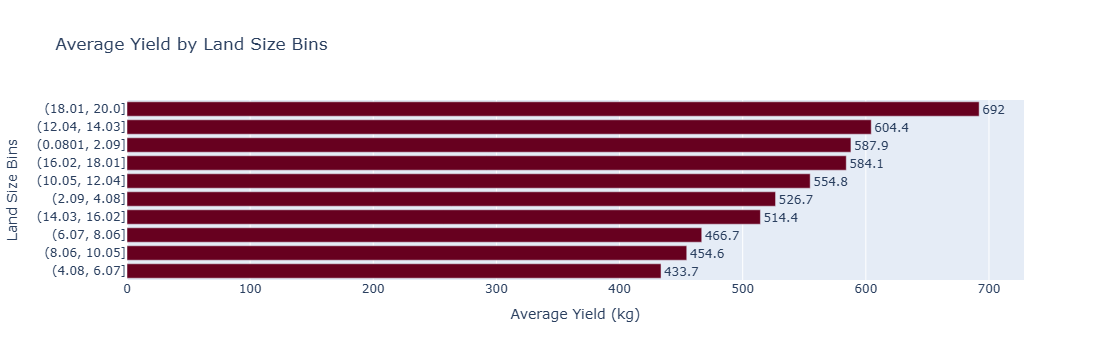

In [72]:
# Create land size bins
df['land_bin'] = pd.cut(df['land_under_rice_llu'], bins=10)

# Group by and convert interval labels to string
land_yield = df.groupby('land_bin')['yield_kg'].mean().reset_index()
land_yield['land_bin'] = land_yield['land_bin'].astype(str)  # Fix for plotly

# Sort by yield
land_yield = land_yield.sort_values(by='yield_kg', ascending=True)

# Create bar chart
fig = px.bar(
    land_yield,
    x='yield_kg',
    y='land_bin',
    orientation='h',
    title='Average Yield by Land Size Bins',
    labels={'yield_kg': 'Average Yield (kg)', 'land_bin': 'Land Size Bins'},
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(text=land_yield['yield_kg'].round(1), textposition='outside')
fig.show()


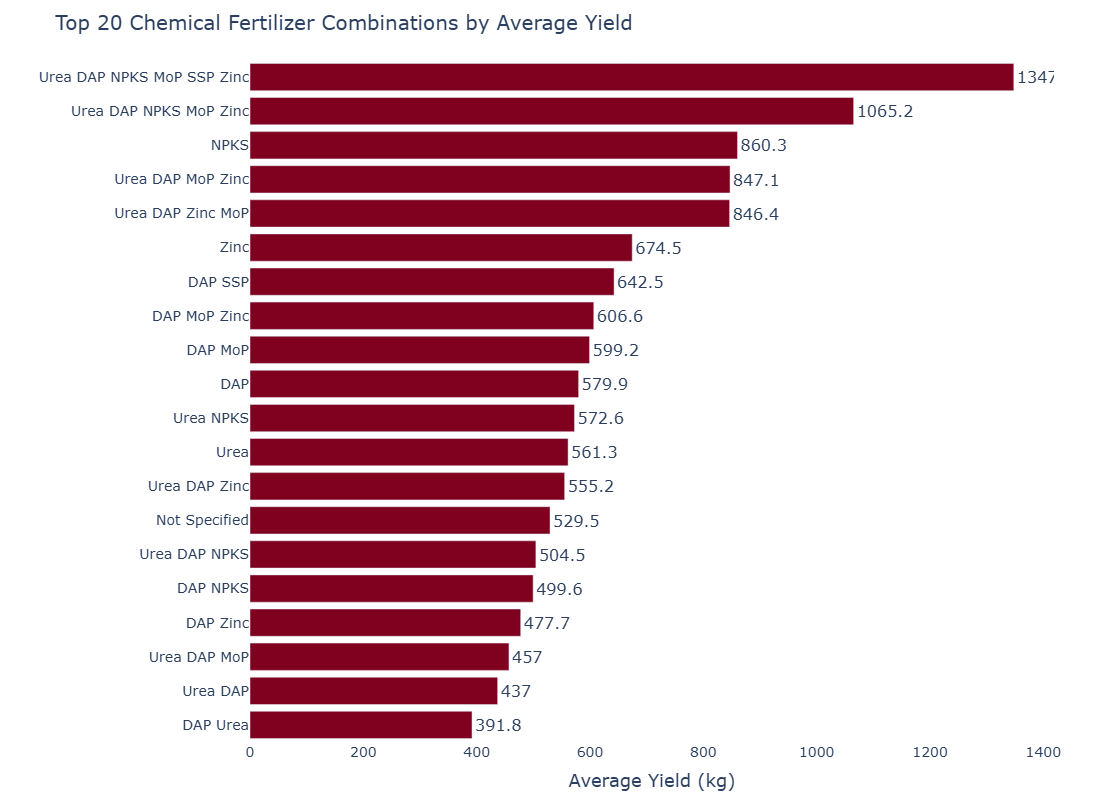

In [73]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Prepare data
top_chem_ferts = (
    df.groupby('chemical_fertilizers_used_list')['yield_kg']
    .agg(['mean', 'count'])
    .sort_values('count', ascending=False)
    .head(20)
    .sort_values('mean', ascending=False)
    .reset_index()
)

# Step 2: Create interactive horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=top_chem_ferts['chemical_fertilizers_used_list'],
    x=top_chem_ferts['mean'],
    orientation='h',
    marker=dict(color='#800020'),  # Maroon color
    text=top_chem_ferts['mean'].round(1),
    textposition='outside',
    textfont=dict(size=16),  # Larger number label text
    hovertemplate='<b>Fertilizer:</b> %{y}<br><b>Avg Yield:</b> %{x:.1f} kg<extra></extra>'
))

# Step 3: Layout customization
fig.update_layout(
    title_text='Top 20 Chemical Fertilizer Combinations by Average Yield',
    title_font_size=20,
    width=1100,  # Increase chart width
    height=800,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(title='Average Yield (kg)', showgrid=False, title_font=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(autorange='reversed', showgrid=False, tickfont=dict(size=14)),
    showlegend=False,
    margin=dict(l=250, r=50, t=60, b=40)  #Increased left margin for long y labels
)

# Show chart
fig.show()


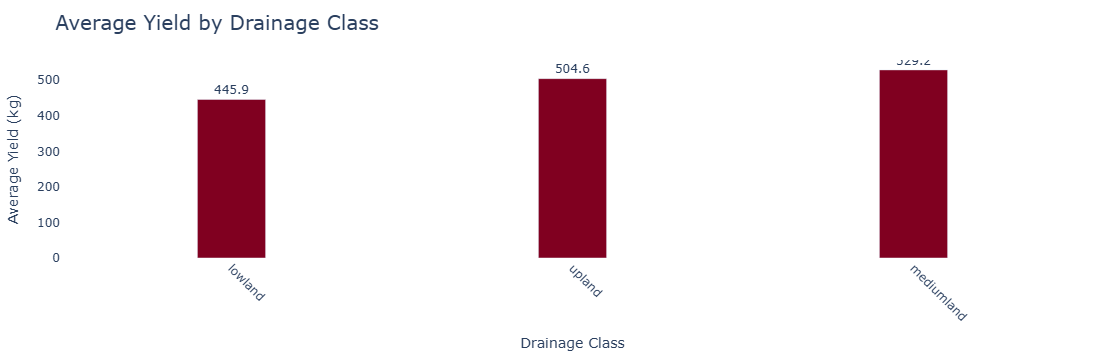

In [48]:
import plotly.graph_objects as go

# Step 1: Group and prepare data
avg_yield = df.groupby('drainage_class')['yield_kg'].mean().sort_values()
x_vals = avg_yield.index.tolist()
y_vals = avg_yield.values.round(1)

# Step 2: Create bar chart with thinner bars
fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_vals,
    y=y_vals,
    width=0.2,  # Reduce bar thickness (default is ~0.8)
    marker_color='#800020',
    text=y_vals,
    textposition='outside',
    hovertemplate='<b>Drainage:</b> %{x}<br><b>Avg Yield:</b> %{y} kg<extra></extra>'
))

# Step 3: Layout styling
fig.update_layout(
    title_text='Average Yield by Drainage Class',
    title_font_size=20,
    xaxis=dict(title='Drainage Class', tickangle=45, showgrid=False),
    yaxis=dict(title='Average Yield (kg)', showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(l=60, r=20, t=60, b=60)
)

fig.show()


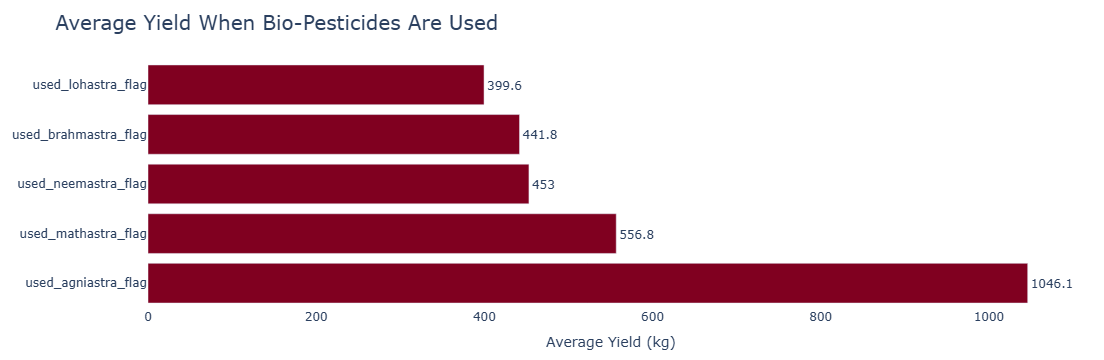

In [53]:
import pandas as pd
import plotly.graph_objects as go

# Define bio-pesticide usage columns
bio_flags = [
    'used_brahmastra_flag', 'used_lohastra_flag', 'used_neemastra_flag',
    'used_mathastra_flag', 'used_agniastra_flag'
]

# Step 1: Compute average yield where each bio-pesticide is used (flag == 1)
bio_yield_contribution = {}
for flag in bio_flags:
    avg_yield = df[df[flag] == 1]['yield_kg'].mean()
    bio_yield_contribution[flag] = round(avg_yield, 1)

# Step 2: Sort values
bio_yield_series = pd.Series(bio_yield_contribution).sort_values()

# Step 3: Interactive horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=bio_yield_series.index,
    x=bio_yield_series.values,
    orientation='h',
    marker_color='#800020',  # Maroon color
    text=bio_yield_series.values,
    textposition='outside',
    hovertemplate='<b>Bio-Pesticide:</b> %{y}<br><b>Avg Yield:</b> %{x} kg<extra></extra>'
))

# Step 4: Clean layout
fig.update_layout(
    title_text='Average Yield When Bio-Pesticides Are Used',
    title_font_size=20,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(title='Average Yield (kg)', showgrid=False),
    yaxis=dict(autorange='reversed', showgrid=False),
    showlegend=False,
    margin=dict(l=100, r=30, t=60, b=40)
)

# Show chart
fig.show()


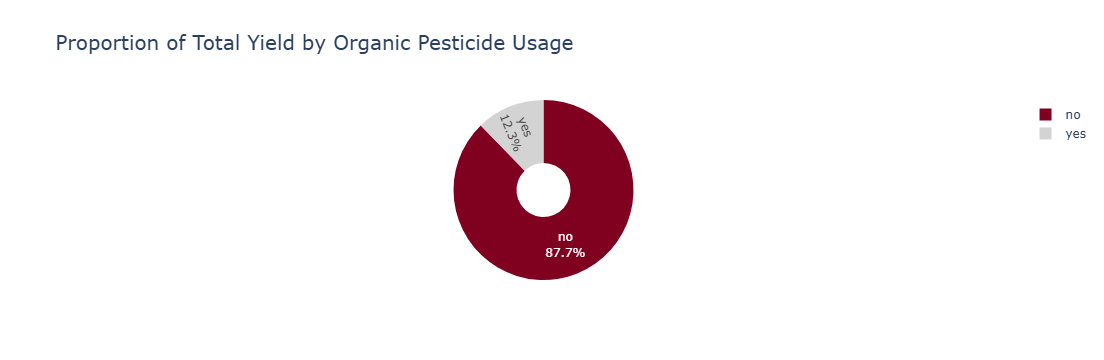

In [54]:
import plotly.graph_objects as go

# Step 1: Group data by organic pesticide usage and sum yield
pie_data = (
    df.groupby('organic_pesticide_used_flag')['yield_kg']
    .sum()
    .rename({'Yes': 'Used', 'No': 'Not Used'})
    .sort_values(ascending=False)
)

# Step 2: Create interactive pie chart
fig = go.Figure(data=[go.Pie(
    labels=pie_data.index,
    values=pie_data.values,
    marker=dict(colors=['#800020', '#d3d3d3']),  # Maroon and light gray
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>Total Yield: %{value:.0f} kg<extra></extra>',
    hole=0.3  # Donut-style
)])

# Step 3: Layout
fig.update_layout(
    title_text='Proportion of Total Yield by Organic Pesticide Usage',
    title_font_size=20,
    paper_bgcolor='white'
)

# Show chart
fig.show()


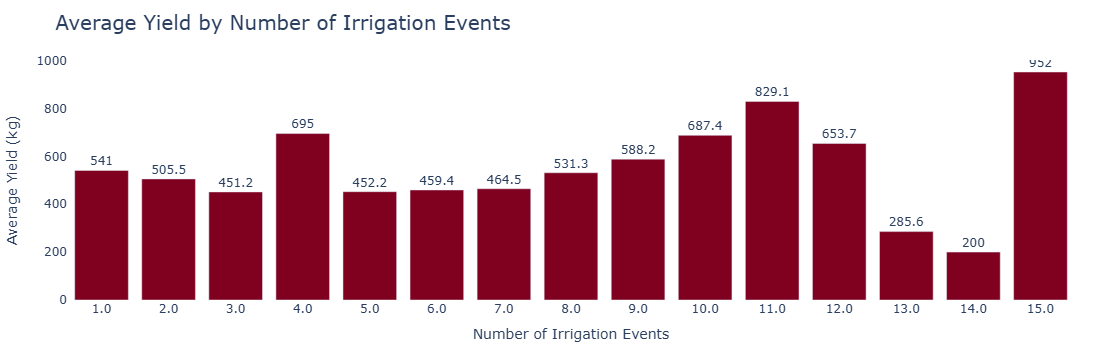

In [55]:
import plotly.graph_objects as go

# Step 1: Group and calculate average yield
irrigation_yield = (
    df.groupby('irrigation_event_count')['yield_kg']
    .mean()
    .sort_index()
    .round(1)
)

# Step 2: Build interactive bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=irrigation_yield.index.astype(str),  # Ensure it's categorical
    y=irrigation_yield.values,
    marker_color='#800020',  # Maroon color
    text=irrigation_yield.values,
    textposition='outside',
    hovertemplate='<b>Irrigation Events:</b> %{x}<br><b>Avg Yield:</b> %{y} kg<extra></extra>'
))

# Step 3: Styling
fig.update_layout(
    title='Average Yield by Number of Irrigation Events',
    title_font_size=20,
    xaxis=dict(title='Number of Irrigation Events'),
    yaxis=dict(title='Average Yield (kg)', showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(l=60, r=30, t=60, b=60)
)

# Display chart
fig.show()


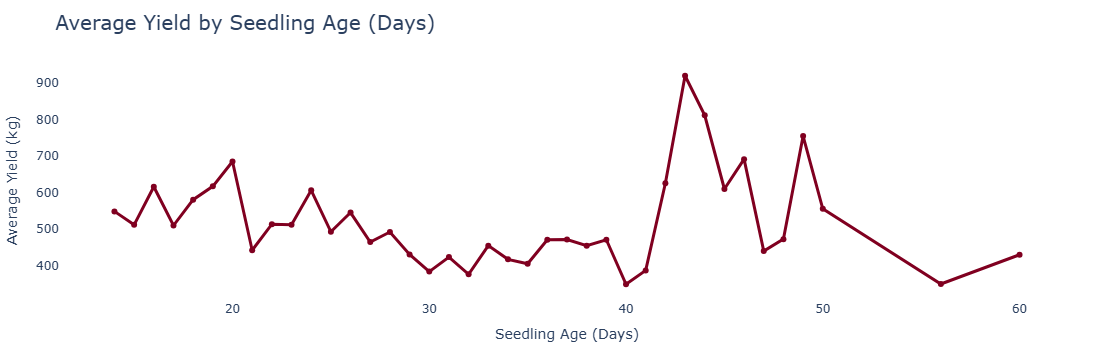

In [56]:
import plotly.graph_objects as go

# Step 1: Group and compute average yield per seedling age
seedling_yield = (
    df.groupby('seedling_age_days')['yield_kg']
    .mean()
    .sort_index()
    .round(1)
)

# Step 2: Build interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=seedling_yield.index,
    y=seedling_yield.values,
    mode='lines+markers',
    line=dict(color='#800020', width=3),
    marker=dict(size=6),
    hovertemplate='<b>Seedling Age:</b> %{x} days<br><b>Avg Yield:</b> %{y} kg<extra></extra>',
    name='Avg Yield'
))

# Step 3: Layout styling
fig.update_layout(
    title='Average Yield by Seedling Age (Days)',
    title_font_size=20,
    xaxis_title='Seedling Age (Days)',
    yaxis_title='Average Yield (kg)',
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(l=60, r=30, t=60, b=60),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Show chart
fig.show()


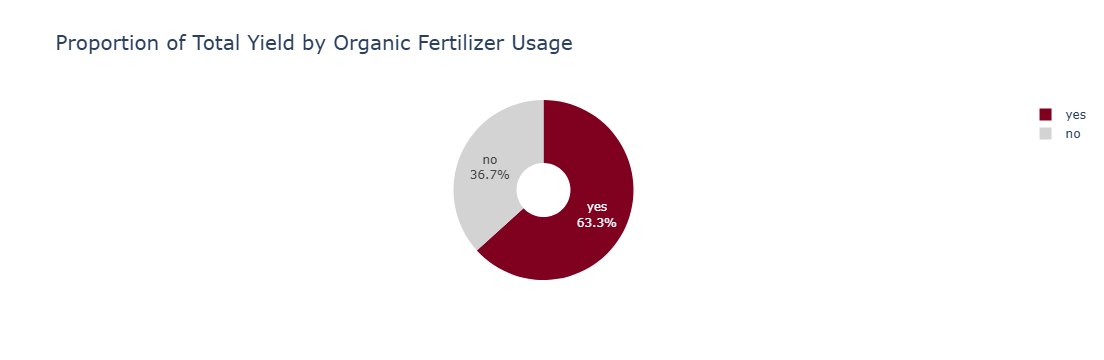

In [57]:
import plotly.graph_objects as go

# Step 1: Group by fertilizer usage and sum yield
organic_fert_yield = (
    df.groupby('organic_fertilizer_used_flag')['yield_kg']
    .sum()
    .rename({'Yes': 'Used', 'No': 'Not Used'})
    .sort_values(ascending=False)
)

# Step 2: Build interactive pie chart
fig = go.Figure(data=[go.Pie(
    labels=organic_fert_yield.index,
    values=organic_fert_yield.values,
    marker=dict(colors=['#800020', '#d3d3d3']),  # Maroon and light gray
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>Total Yield: %{value:.0f} kg<extra></extra>',
    hole=0.3  # Optional donut style
)])

# Step 3: Layout
fig.update_layout(
    title='Proportion of Total Yield by Organic Fertilizer Usage',
    title_font_size=20,
    paper_bgcolor='white'
)

# Show chart
fig.show()


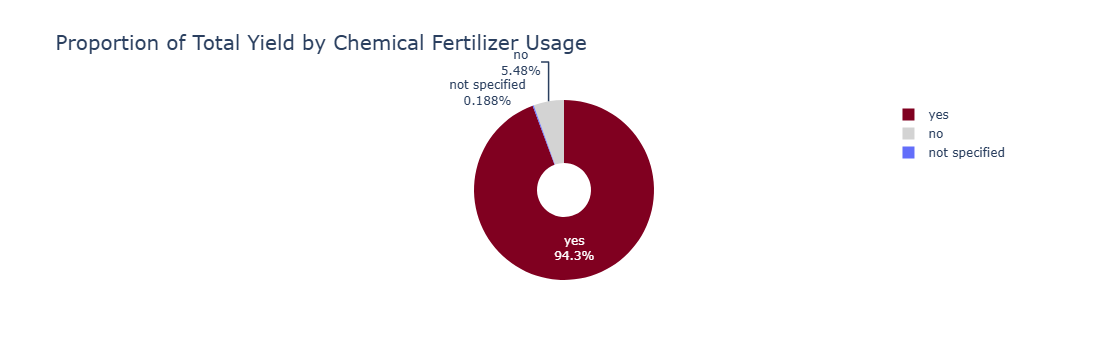

In [58]:
import plotly.graph_objects as go

# Step 1: Aggregate yield by chemical fertilizer usage
chem_fert_yield = (
    df.groupby('chemical_fertilizer_used_flag')['yield_kg']
    .sum()
    .rename({'Yes': 'Used', 'No': 'Not Used'})
    .sort_values(ascending=False)
)

# Step 2: Create pie chart
fig = go.Figure(data=[go.Pie(
    labels=chem_fert_yield.index,
    values=chem_fert_yield.values,
    marker=dict(colors=['#800020', '#d3d3d3']),  # Maroon and light gray
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>Total Yield: %{value:.0f} kg<extra></extra>',
    hole=0.3
)])

# Step 3: Styling
fig.update_layout(
    title='Proportion of Total Yield by Chemical Fertilizer Usage',
    title_font_size=20,
    paper_bgcolor='white'
)

# Show chart
fig.show()


## CORRELATION ANALYSIS AND HYPOTHESIS TESTS

### CORRELATION ANALYSIS

 ### correlation between yield_kg and other numeric factors.

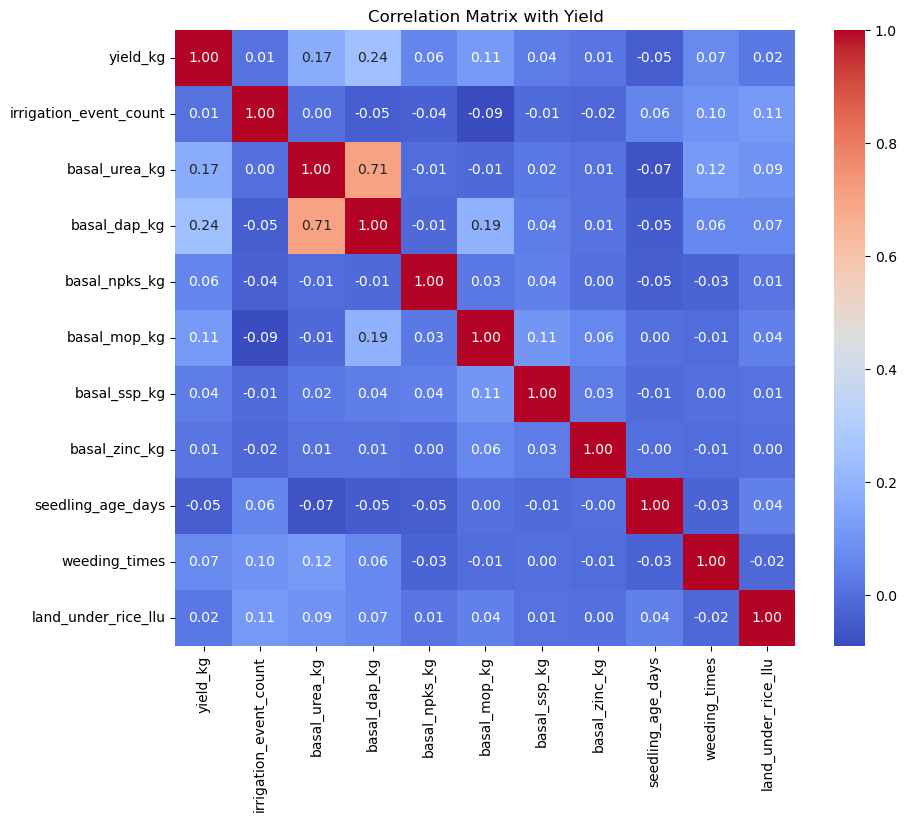

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns of interest
num_cols = [
    'yield_kg',
    'irrigation_event_count',
    'basal_urea_kg',
    'basal_dap_kg',
    'basal_npks_kg',
    'basal_mop_kg',
    'basal_ssp_kg',
    'basal_zinc_kg',
    'seedling_age_days',
    'weeding_times',
    'land_under_rice_llu'
]

# Drop rows with missing values
# df_corr = df[num_cols].dropna()

# Correlation matrix
corr_matrix = df[num_cols].corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Yield")
plt.show()


### Correlation of Distribution of Yield

In [61]:
correlation = df[['land_under_rice_llu', 'yield_kg']].corr(method='pearson')
print(correlation) 

                     land_under_rice_llu  yield_kg
land_under_rice_llu             1.000000  0.022472
yield_kg                        0.022472  1.000000


### correlation between total_cultivable_land_llu and yield_kg

In [62]:
correlation = df[['total_cultivable_land_llu', 'yield_kg']].corr(method='pearson')
print(correlation)


                           total_cultivable_land_llu  yield_kg
total_cultivable_land_llu                   1.000000  0.022472
yield_kg                                    0.022472  1.000000


### correlation between seedling age and yield_kg

In [63]:
correlation = df[['seedling_age_days', 'yield_kg']].corr(method='pearson')
print(correlation)


                   seedling_age_days  yield_kg
seedling_age_days           1.000000 -0.045071
yield_kg                   -0.045071  1.000000


## HYPOTHESIS TESTS

### Does irrigation affect yield?

In [64]:
from scipy.stats import ttest_ind

# Create two groups based on string values
group1 = df[df['irrigation_applied_flag'] == 'Yes']['yield_kg']
group2 = df[df['irrigation_applied_flag'] == 'No']['yield_kg']

# Run the t-test
t_stat, p_val = ttest_ind(group1, group2)

# Output the result
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")



T-statistic = nan, p-value = nan


### Does tillage method affect yield by using ANOVA

In [69]:
from scipy.stats import f_oneway

# Step 1: Prepare the data — only keep relevant columns and drop missing values
anova_data = df[['rice_tillage_method', 'yield_kg']].dropna()

# Step 2: Group yield data by rice tillage method
groups = [group['yield_kg'].values for name, group in anova_data.groupby('rice_tillage_method')]

# Step 3: Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

# Step 4: Output the results
print(" ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Optional: interpret result
if p_val < 0.05:
    print(" Statistically significant differences in yield across rice tillage methods.")
else:
    print(" No significant difference in yield across rice tillage methods.")


 ANOVA Results:
F-statistic: 19.7861
P-value: 0.0000
 Statistically significant differences in yield across rice tillage methods.


#### If p < 0.05, different tillage methods lead to significant yield differences.

### Organic vs Chemical Fertilizer Impact on Yield

In [70]:
from scipy.stats import ttest_ind

# Filter using correct values (change to 'Yes' or 1 based on your data)
org = df[df['organic_fertilizer_used_flag'] == 'Yes']['yield_kg']
chem = df[df['chemical_fertilizer_used_flag'] == 'Yes']['yield_kg']

# Run t-test
t_stat, p_val = ttest_ind(org, chem)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


T-statistic = nan, p-value = nan


### 4. Challenges & Data Gaps Documentation

In [ ]:
# Identify data quality issues
data_gaps = {
    'missing_values': df.isnull().sum(),
    'outliers': {
        'weeding_times': len(df[~df['weeding_times'].between(1,5)]),
        'yield_kg': len(df[df['yield_kg'] > df['yield_kg'].quantile(0.99)])
    }
}

print("\nDATA QUALITY REPORT:")
for issue, details in data_gaps.items():
    print(f"\n{issue}:")
    print(details)

### 5. Evidence-Based Recommendations

#### Evidence-Based Recommendations
##### From Analysis to Action:

Extension Priorities:

Target districts with lowest 25% yields for improved irrigation training

Promote balanced fertilizer use where high Urea/DAP ratios correlate with low yields

Input Optimization:
### Pest Management:

Develop targeted advisories for districts with high disease incidence

Highlight successful organic pesticide cases (e.g., farms using jivamrit with low disease rates)


